In [1]:
import pickle
import pandas as pd
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, train_test_split, cross_validate, RepeatedStratifiedKFold, GridSearchCV
import numpy as np
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
import seaborn as sns
import sys
sys.path.append('/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions')
from Evaluation import *
from Preparation import *

In [2]:
X, y, targets, data = preparation_class_8()

/Users/ayoucruz/Desktop/Data_Science/3nd_Semester/DATA7901 Capstone project/Capstone/Models/Functions/Preparation.py:425: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv('../../Dataset/Location.csv')


In [3]:
targets.value_counts()

Crash_Severity      
Serious injury          230687
Property damage only     85807
Minor injury             51083
Fatal                     5713
Name: count, dtype: int64

### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.columns = [c.replace(' ', '_') for c in X_train.columns]
X_test.columns = [c.replace(' ', '_') for c in X_test.columns]

### Trainning Baseline

Accuracy:  0.6203621848964612
Precision:  0.9525614689508425
Recall:  0.6203621848964612
F1-Score:  0.7433885051359627
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.00      0.00      0.00         2
   Minor injury       0.00      0.00      0.00         0
Property damage       0.06      0.48      0.11      2253
 Serious injury       0.98      0.62      0.76     72403

       accuracy                           0.62     74658
      macro avg       0.26      0.28      0.22     74658
   weighted avg       0.95      0.62      0.74     74658



/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayoucruz/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayoucruz/miniconda3/lib/python3.11/site-packag

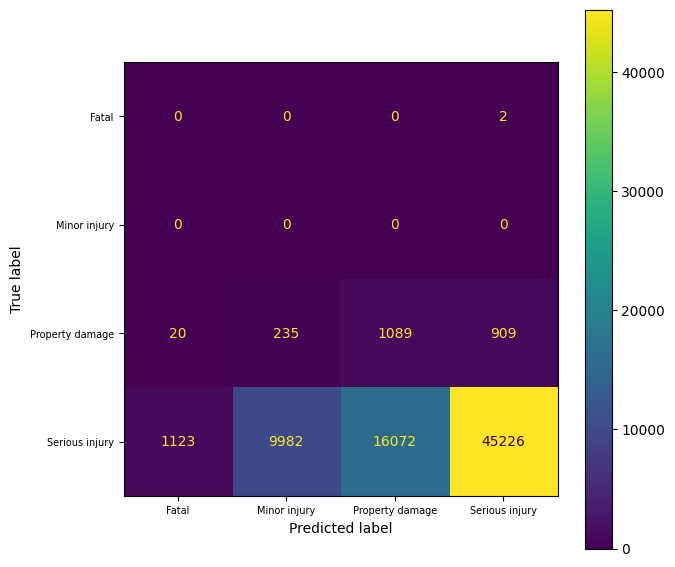

In [9]:
model = LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_class_8(y_pred, y_test)

In [12]:
pipeline_smote = make_imb_pipeline(SMOTE(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_smoteen = make_imb_pipeline(SMOTEENN(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_tomek = make_imb_pipeline(SMOTETomek(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))
pipeline_under = make_imb_pipeline(RandomUnderSampler(random_state=42), LGBMClassifier(n_jobs=-1, force_row_wise=True, verbose=0))

### SMOTE

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.4272382273185317
-------------------------------------------------------------
Evaluation
Accuracy:  0.4144632859171154
Precision:  0.40014004339337494
Recall:  0.4144632859171154
F1-Score:  0.38307867702593035
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.34      0.07      0.12      5584
   Minor injury       0.35      0.19      0.25     18282
Property damage       0.43      0.34      0.38     21567
 Serious injury       0.43      0.68      0.52     29225

       accuracy                           0.41     74658
      macro avg       0.38      0.32      0.32     74658
   weighted avg       0.40      0.41      0.38     74658



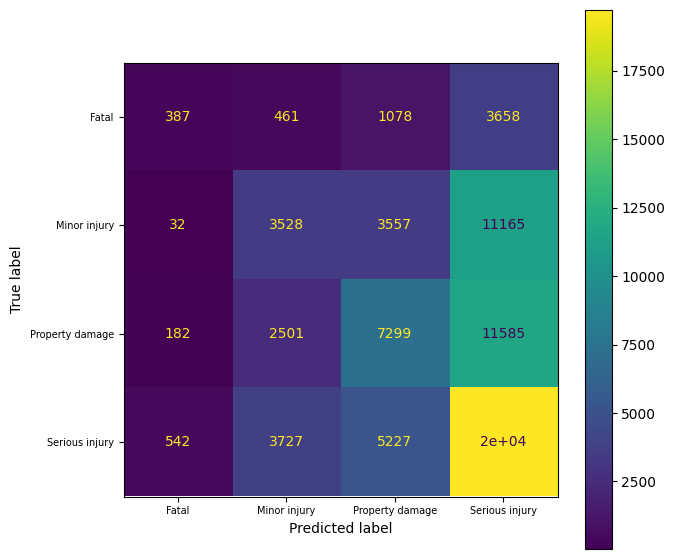

In [13]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smote, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
import pickle
with open('lgbm_smote.pkl', 'wb') as file:
    pickle.dump(grid_search, file)


### Undersampling

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.262992556369681
-------------------------------------------------------------
Evaluation
Accuracy:  0.25817728843526483
Precision:  0.4665976043433821
Recall:  0.25817728843526483
F1-Score:  0.24872578277041438
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.72      0.05      0.09     17797
   Minor injury       0.45      0.18      0.26     24982
Property damage       0.42      0.33      0.37     22082
 Serious injury       0.14      0.67      0.24      9797

       accuracy                           0.26     74658
      macro avg       0.43      0.31      0.24     74658
   weighted avg       0.47      0.26      0.25     74658



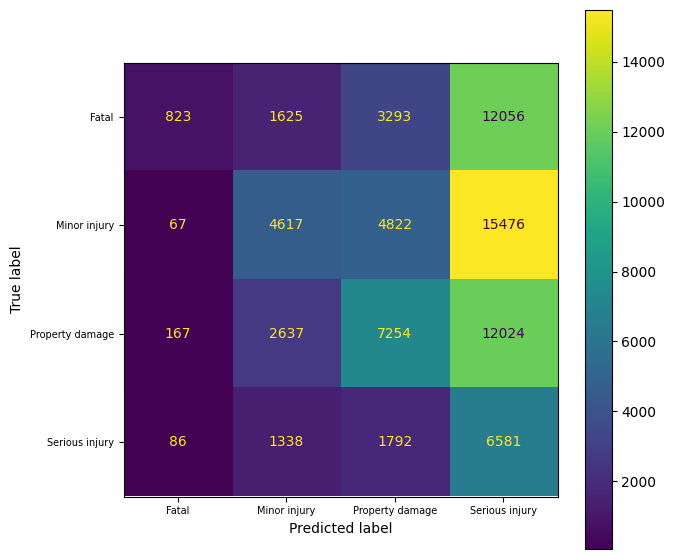

In [15]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_under, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('lgbm_undersampling.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

### SMOTEENN

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.5672466268082411
-------------------------------------------------------------
Evaluation
Accuracy:  0.5784644646253583
Precision:  0.7310756160758639
Recall:  0.5784644646253583
F1-Score:  0.6369495618855705
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.20      0.10      0.14      2194
   Minor injury       0.04      0.19      0.06      1895
Property damage       0.20      0.38      0.26      8984
 Serious injury       0.85      0.64      0.73     61585

       accuracy                           0.58     74658
      macro avg       0.32      0.33      0.30     74658
   weighted avg       0.73      0.58      0.64     74658



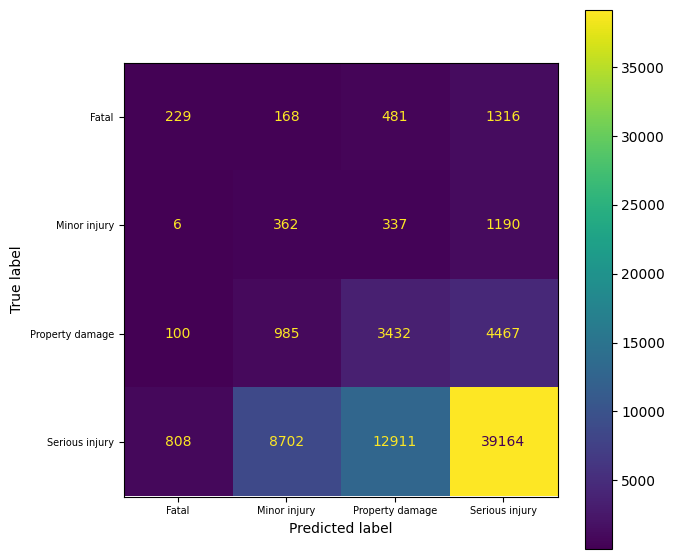

In [16]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_smoteen, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('lgbm_smoteen.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

### SMOTE TOMEK

Best parameters: {'lgbmclassifier__n_estimators': 100}
Best score:  0.42699712062788614
-------------------------------------------------------------
Evaluation
Accuracy:  0.4165796029896327
Precision:  0.40117084012417314
Recall:  0.4165796029896327
F1-Score:  0.38513335241828794
--------------------------------------------
                 precision    recall  f1-score   support

          Fatal       0.33      0.07      0.12      5440
   Minor injury       0.35      0.19      0.25     18764
Property damage       0.42      0.34      0.38     20872
 Serious injury       0.43      0.67      0.53     29582

       accuracy                           0.42     74658
      macro avg       0.38      0.32      0.32     74658
   weighted avg       0.40      0.42      0.39     74658



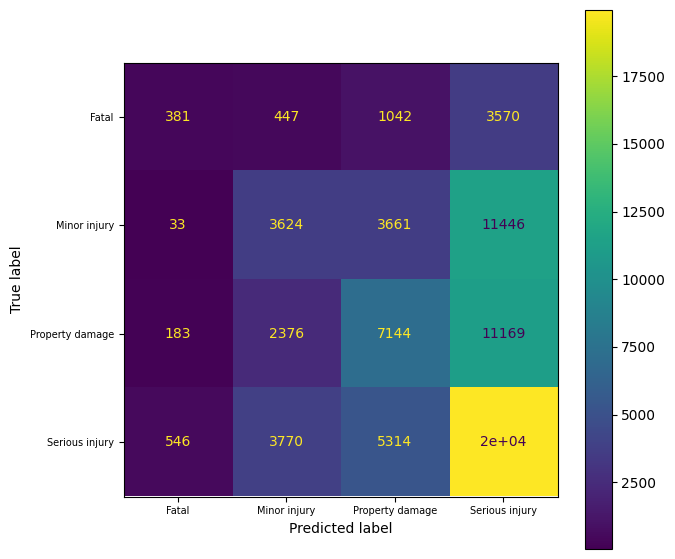

In [17]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
param_grid = {
    'lgbmclassifier__n_estimators': [100]
}
grid_search = GridSearchCV(pipeline_tomek, param_grid, cv=rskf, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("-------------------------------------------------------------")
print("Evaluation")
y_pred = grid_search.predict(X_test)
evaluation_class_8(y_pred, y_test)
with open('lgbm_tomek.pkl', 'wb') as file:
    pickle.dump(grid_search, file)